In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.ExcelFile('TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx')
df1=df.parse('Existing employees')
df2=df.parse('Employees who have left')

In [3]:
df1['left']=0
df2['left']=1

In [4]:
final_df=df1.append(df2)
final_df

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0
5,2006,0.36,0.95,3,206,4,0,0,sales,low,0
6,2007,0.54,0.37,2,176,2,0,0,sales,low,0
7,2008,0.99,0.91,5,136,4,0,0,sales,low,0
8,2009,0.50,0.75,6,127,3,0,0,sales,low,0
9,2010,0.74,0.64,4,268,3,0,0,sales,low,0


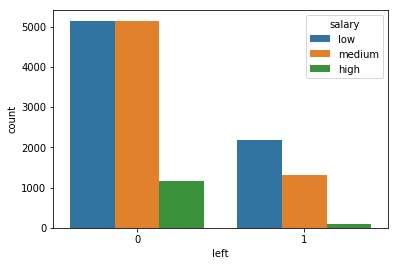

In [6]:
sns.countplot(x='left',data=final_df,hue="salary")
#so most of the people who left had low or medium salaries and very few had high salaries and they stil left

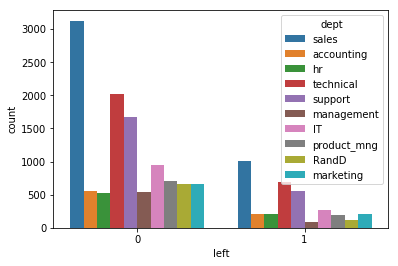

In [7]:
sns.countplot(x='left',data=final_df,hue="dept")
#most of the people who left were from the sales department,least from management

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 11 columns):
Emp ID                   14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.7+ MB


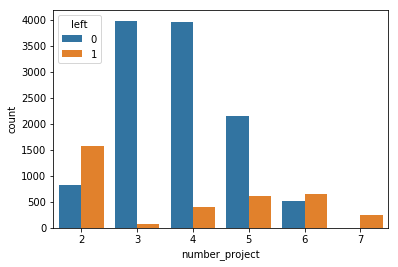

In [11]:
sns.countplot(x='number_project',data=final_df,hue="left")
#mostly the people who were assigned 3 or 4 projects were the ones who left

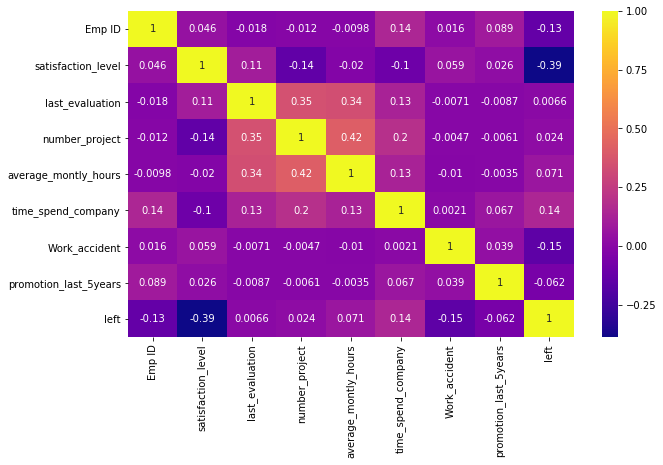

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(final_df.corr(),annot=True,cmap='plasma')
#we can see there is a strong negative correlation between the left and satifaction thing..so we can observe that people leave as the satisfaction level decreases.

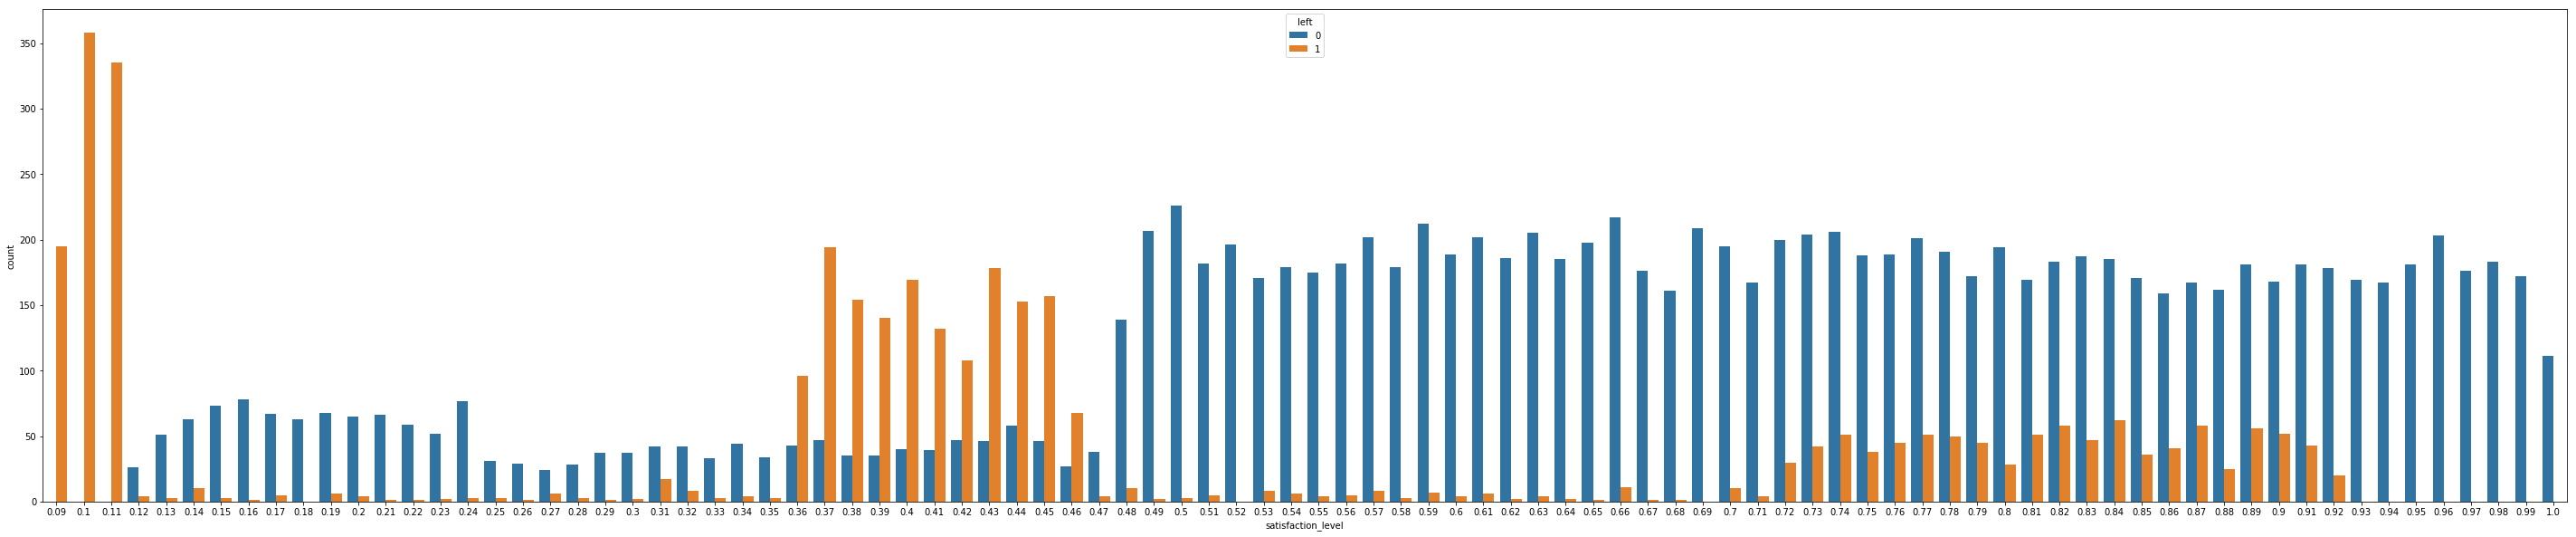

In [21]:
#and here we can successfully visualise it
plt.figure(figsize=(50,10))
sns.countplot(x='satisfaction_level',data=final_df,hue="left")

In [24]:
"""Now if we observe the correlation matrix or the heatmap we see that the satisfaction level depends on the time spend in the company
the average monthly hours and thenumber of projects to a great extend because the satisfaction level decreases as the number of projects increase or thhe time spent in the company or the average monthly hours increase"""

'Now if we observe the correlation matrix or the heatmap we see that the satisfaction level depends on the time spend in the company\nthe average monthly hours and thenumber of projects to a great extend because the satisfaction level decreases as the number of projects increase or thhe time spent in the company or the average monthly hours increase'

In [25]:
datas=pd.DataFrame(final_df[['satisfaction_level','number_project','average_montly_hours','time_spend_company']])

In [39]:
datas.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company
0,0.58,4,215,3
1,0.82,2,202,3
2,0.45,5,193,3
3,0.78,5,247,3
4,0.49,3,214,2


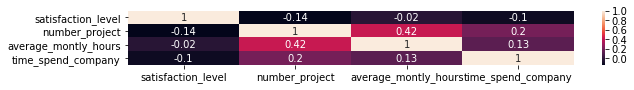

In [41]:
plt.figure(figsize=(10,1))
sns.heatmap(datas.corr(),annot=True)

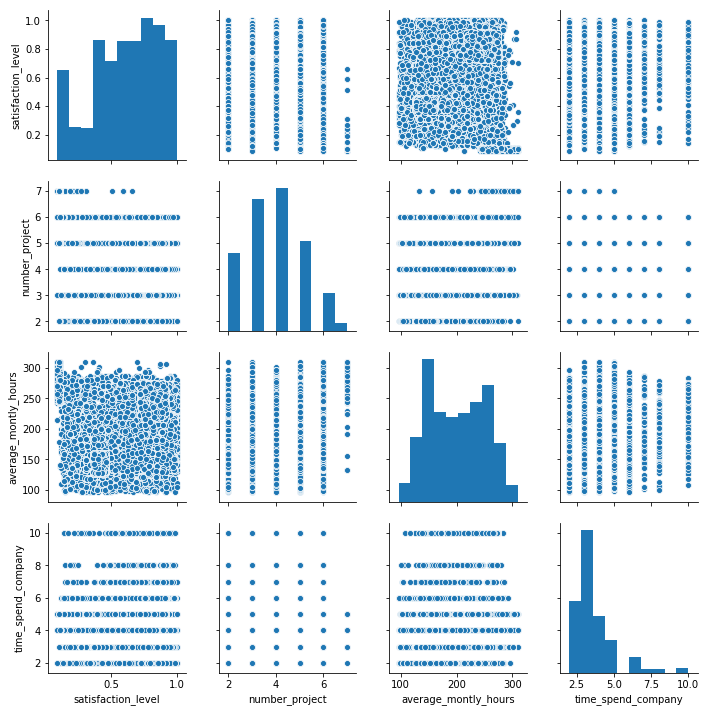

In [30]:
sns.pairplot(datas)

In [31]:
#now if we observe the paiplots, we see that the the plot of satisfaction level vs the average monthly hours almost has a zero correlation, so it affects the satisfaction level to a very less extent and can be ignored as a reason for leaving the comapny

In [32]:
#so the two important factors we are left with are the number_project and time spent in the company

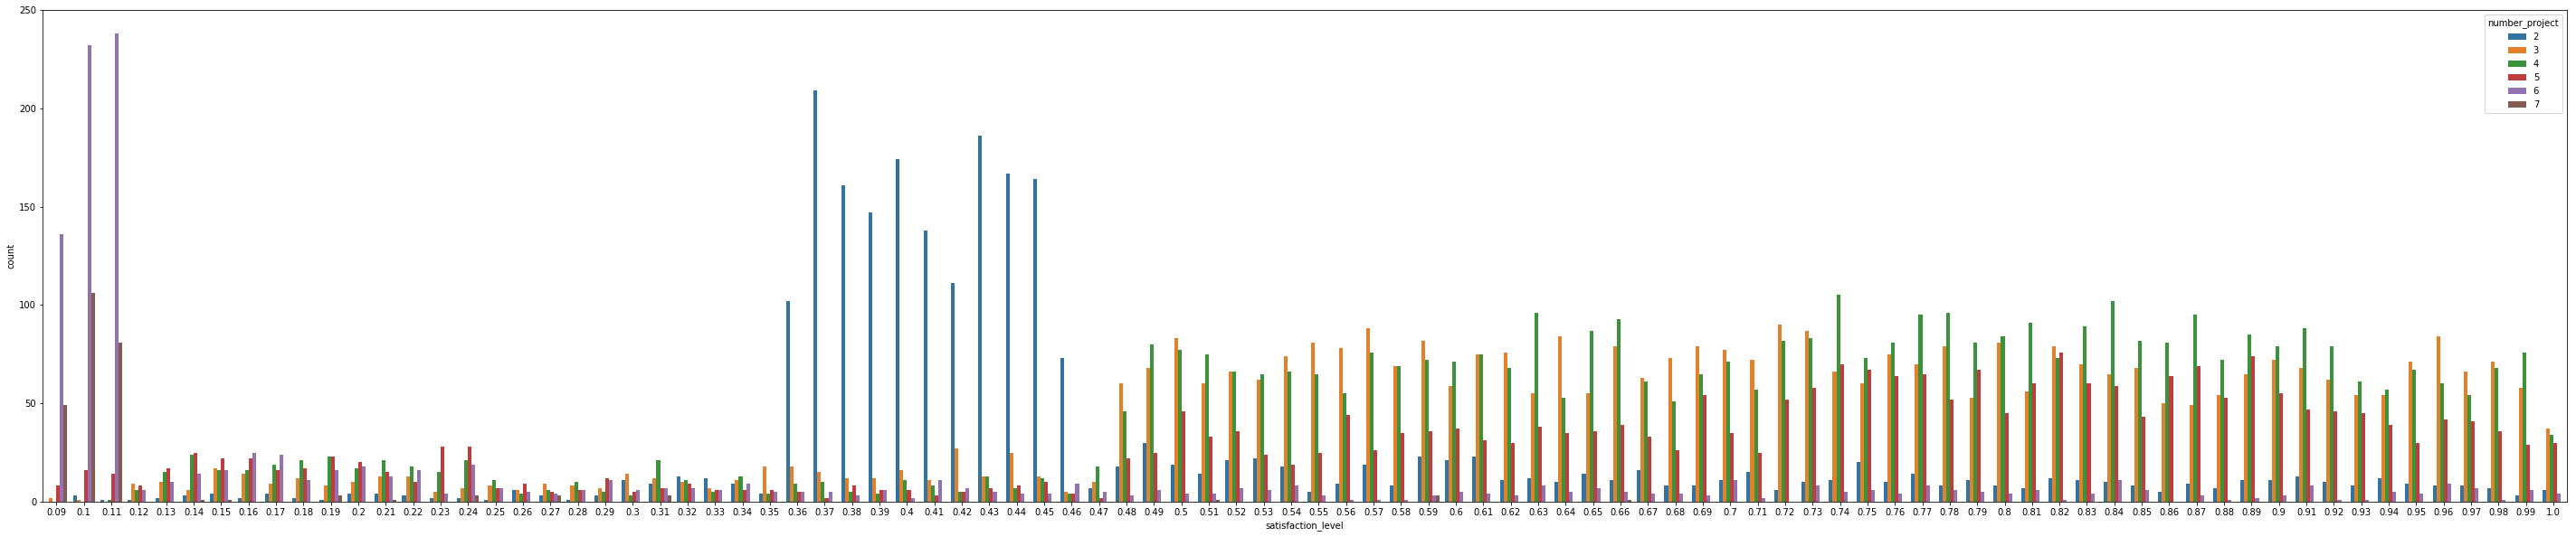

In [37]:
plt.figure(figsize=(50,10))
sns.countplot(x='satisfaction_level',data=datas,hue="number_project")

In [36]:
#so the satisfaction level is really less with the high number of projects

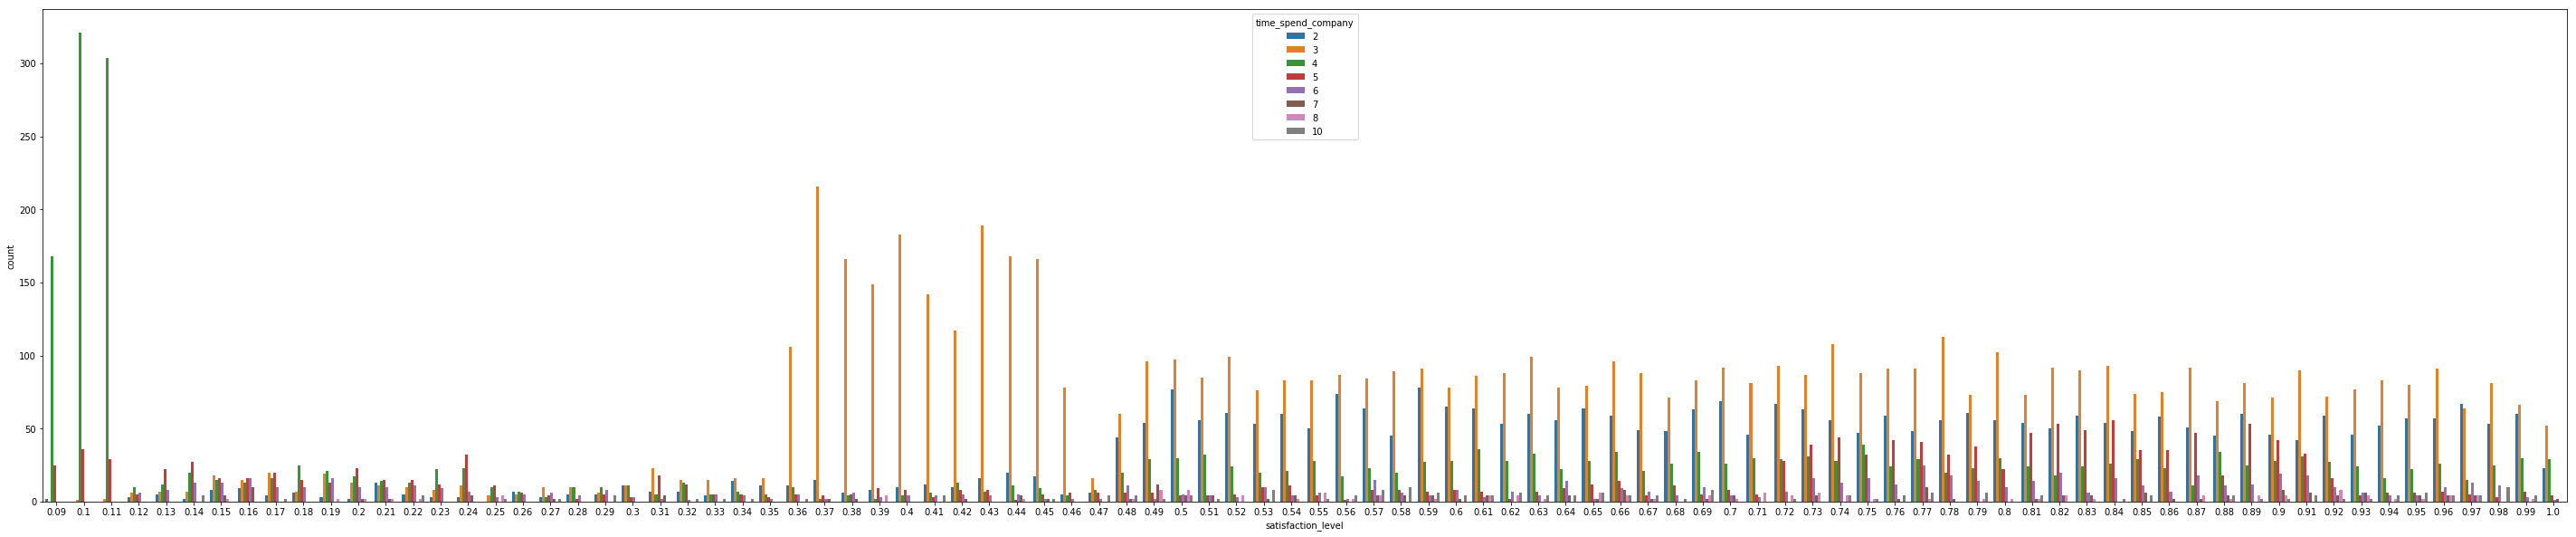

In [38]:
plt.figure(figsize=(50,10))
sns.countplot(x='satisfaction_level',data=datas,hue="time_spend_company")